In [1]:
%load_ext autoreload
%autoreload 2
import torch 
import torch.nn as nn 
from viz_lib.core import plt, image, images_list

Formula:

$\mbox{output} = s (n - 1) + k - 2p$

random_tensor: torch.Size([1, 1, 50, 50])
p | k | s : output.shape
0 | 2 | 1 :                 (1, 1, 51, 51), 51
0 | 2 | 2 :               (1, 1, 100, 100), 100
0 | 2 | 3 :               (1, 1, 149, 149), 149
0 | 2 | 4 :               (1, 1, 198, 198), 198
0 | 2 | 5 :               (1, 1, 247, 247), 247
0 | 3 | 1 :                 (1, 1, 52, 52), 52
0 | 3 | 2 :               (1, 1, 101, 101), 101
0 | 3 | 3 :               (1, 1, 150, 150), 150
0 | 3 | 4 :               (1, 1, 199, 199), 199
0 | 3 | 5 :               (1, 1, 248, 248), 248
0 | 4 | 1 :                 (1, 1, 53, 53), 53
0 | 4 | 2 :               (1, 1, 102, 102), 102
0 | 4 | 3 :               (1, 1, 151, 151), 151
0 | 4 | 4 :               (1, 1, 200, 200), 200
0 | 4 | 5 :               (1, 1, 249, 249), 249
0 | 5 | 1 :                 (1, 1, 54, 54), 54
0 | 5 | 2 :               (1, 1, 103, 103), 103
0 | 5 | 3 :               (1, 1, 152, 152), 152
0 | 5 | 4 :               (1, 1, 201, 201), 201
0 | 5 | 5 :              

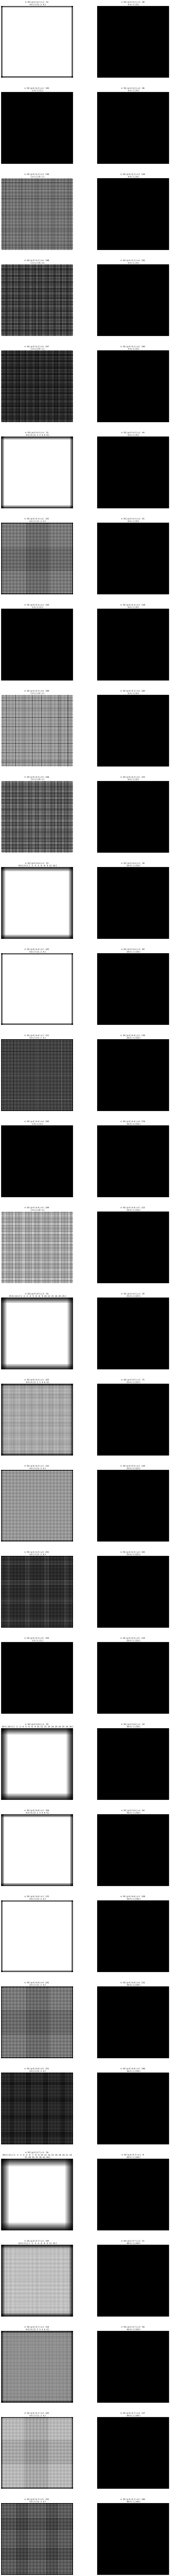

In [7]:
n = 50

random_tensor = torch.randn(1, 1, n, n)
ones_tensor = torch.ones((1, 1, n, n))
print(f'random_tensor: {ones_tensor.shape}')

paddings = [0]
kernel_sizes = [2, 3, 4, 5, 6, 7]
strides = [1, 2, 3, 4, 5]

outputs = []
conv_outputs = []
titles = []
conv_titles = []
print(f'p | k | s : output.shape')
for p in paddings:
    for k in kernel_sizes:
        for s in strides:
            N = s*(n-1)+k-(2*p)
            big_ones_tensor = torch.ones((1, 1, N, N))
            
            deconv_fn = nn.ConvTranspose2d(in_channels = 1,
                                               out_channels = 1,
                                               kernel_size = k,
                                               stride = s,
                                               padding = p,
                                               bias=False)
            conv_fn = nn.Conv2d(in_channels = 1,
                                out_channels = 1,
                                kernel_size = 1,
                                dilation = s,
                                padding = p,
                                bias=False)
            
            deconv_fn.weight[:] = 1.0
            output = deconv_fn(ones_tensor).detach().numpy()
            unique = np.unique(output)
            titles.append(f'n: {n} | p:{p} | k:{k} | s:{s} : {s*(n-1)+k-(2*p)} \n {np.max(output)} | {len(unique)} | {unique}')
            outputs.append(output[0,0,:,:])
            
            conv_fn.weight[:] = 1.0
            conv_output = conv_fn(big_ones_tensor).detach().numpy()
            conv_unique = np.unique(conv_output)
            conv_titles.append(f'n: {n} | p:{p} | k:{k} | s:{s} : {conv_output.shape[-1]} \n {np.max(conv_output)} | {len(conv_unique)} | {conv_unique}')
            conv_outputs.append(conv_output[0,0,:,:])
            
            
_, axs = plt.subplots(len(outputs), 2)
plt.rcParams['figure.figsize'] = (20, 10*len(outputs))
images_list(outputs, titles, ax=axs[:, 0], cmap='gray', col=True)
images_list(conv_outputs, conv_titles, ax=axs[:, 1], cmap='gray', col=True)